In [12]:
import numpy as np
import pandas as pd
import geopandas as gp
import pandas_profiling
from datetime import datetime

# import seaborn as sb 
# import json
# from shapely.geometry import LineString, Polygon, Point
# from shapely import wkt

import matplotlib.pyplot as plt
%matplotlib inline

### display all columns
pd.set_option('display.max_columns', None)

In [13]:
df2019 = pd.read_csv('rawdata/MyLA311_Service_Request_Data_2019.csv')
df2019.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,AssignTo,ServiceDate,ClosedDate,AddressVerified,ApproximateAddress,Address,HouseNumber,Direction,StreetName,Suffix,ZipCode,Latitude,Longitude,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1262692791,01/01/2019 12:02:05 AM,01/04/2019 11:03:56 AM,SR Created,BOS,Bulky Items,Closed,Self Service,Self Service_SAN,NaN,N,NC,01/04/2019 12:00:00 AM,01/04/2019 11:03:56 AM,Y,N,"616 N GRAMERCY PL, 90004",616,N,GRAMERCY,PL,90004.0,34.082258,-118.312461,"(34.0822581437, -118.312461304)",593,H,7.0,Central APC,4.0,David Ryu,119.0,GREATER WILSHIRE NC,OLYMPIC
1,1-1262693531,01/01/2019 12:05:52 AM,01/01/2019 12:09:40 AM,SR Created,LADWP,Report Water Waste,Closed,Mobile App,Self Service,Android,N,NaN,NaN,01/01/2019 12:05:52 AM,Y,NaN,"11500 W SAN VICENTE BLVD, 90049","11,500",W,SAN VICENTE,BLVD,90049.0,34.052739,-118.461185,"(34.052739298, -118.461184916)",631,J,4.0,West Los Angeles APC,11.0,Mike Bonin,NaN,NaN,WEST LOS ANGELES
2,1-1262693571,01/01/2019 12:10:52 AM,01/03/2019 12:27:05 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,N,WVA,01/02/2019 08:43:54 AM,01/03/2019 12:27:05 AM,Y,N,"9167 N RESEDA BLVD, 91324","9,167",N,RESEDA,BLVD,91324.0,34.236888,-118.536385,"(34.2368883475, -118.53638542)",500,J,7.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
3,1-1262692831,01/01/2019 12:19:53 AM,01/07/2019 09:43:46 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Self Service,Self Service,NaN,N,WV,01/07/2019 12:00:00 AM,01/07/2019 09:39:12 AM,Y,N,"8752 N YOLANDA AVE, 91324","8,752",N,YOLANDA,AVE,91324.0,34.230222,-118.539758,"(34.2302221251, -118.539758291)",530,H,1.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE
4,1-1262692061,01/01/2019 12:28:15 AM,01/03/2019 12:28:19 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,Self Service,NaN,N,WVA,01/02/2019 10:12:35 AM,01/03/2019 12:28:19 AM,Y,N,"9055 N RESEDA BLVD, 91324","9,055",N,RESEDA,BLVD,91324.0,34.235078,-118.536392,"(34.2350781243, -118.536391683)",500,J,7.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE


In [14]:
df2019.shape

(1186428, 34)

In [15]:
df2019.CreatedDate.isna().sum()

0

In [16]:
df2019.ClosedDate.isna().sum()

36337

In [17]:
df2019.ServiceDate.isna().sum()

74540

In [18]:
df2019_open = df2019[df2019.Status == 'Open']
df2019_open.shape

(24199, 34)

In [19]:
# all open-status entries, selected by NA ServiceDates and non-NA CreatedDates

df2019_notServiced = df2019_open[df2019_open.ServiceDate.isna() & df2019_open.CreatedDate.notna()]
df2019_notServiced.shape

(7539, 34)

In [20]:
# all open-status entries, selected by invalid ClosedDates and non-invalid CreatedDates

df2019_notClosed = df2019_open[df2019_open.ClosedDate.isna() & df2019_open.CreatedDate.notna()]
df2019_notClosed.shape

# there are significantly less NA ServiceDates than there are ClosedDates

(24199, 34)

In [21]:
dt_cols = ['CreatedDate','UpdatedDate','ServiceDate','ClosedDate']
for col in dt_cols:
    df2019_open[col] = pd.to_datetime(df2019_open[col])
    
df2019_open['ClosedDate_open'] = df2019_open[ClosedDate].replace(to_replace=pd.NaT, value=datetime.now())
df2019_open['ServiceDate_open'] = df2019_open[ServiceDate].replace(to_replace=pd.NaT, value=datetime.now())

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,AssignTo,ServiceDate,ClosedDate,AddressVerified,ApproximateAddress,Address,HouseNumber,Direction,StreetName,Suffix,ZipCode,Latitude,Longitude,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct,ClosedDiff,ServiceDiff,ClosedServiceDiff,ClosedDiff_Days,ServiceDiff_Days,ClosedServiceDiff_Days
146,1-1262715591,2019-01-01 09:41:28,2019-01-01 09:41:28,SR Created,OCB,Graffiti Removal,Open,Self Service,Self Service,NaN,N,GCS,2019-11-26 19:45:02.075844,2019-11-26 19:45:02.076354,Y,N,"14045 W FOOTHILL BLVD, 91342","14,045",W,FOOTHILL,BLVD,91342.0,34.314603,-118.439434,"(34.31460335, -118.439433747)",482,B,3.0,North Valley APC,7.0,Monica Rodriguez,5.0,SYLMAR NC,MISSION,329 days 10:03:34.076354,329 days 10:03:34.075844,00:00:00.000510,329.419144,329.419144,5.902778e-09
640,1-1262787021,2019-01-01 15:24:26,2019-01-01 15:24:26,SR Created,BSL,Single Streetlight Issue,Open,Call,ITA,NaN,N,WEST,2019-11-26 19:45:02.075844,2019-11-26 19:45:02.076354,Y,Y,"179 S GRETNA GREEN WAY, 90049",179,S,GRETNA GREEN,WAY,90049.0,34.056297,-118.477903,"(34.0562973, -118.47790277)",631,G,4.0,West Los Angeles APC,11.0,Mike Bonin,NaN,NaN,WEST LOS ANGELES,329 days 04:20:36.076354,329 days 04:20:36.075844,00:00:00.000510,329.180973,329.180973,5.902778e-09
1197,1-1262865381,2019-01-01 23:33:40,2019-01-01 23:33:42,SR Created,BSL,Single Streetlight Issue,Open,Mobile App,Self Service,iOS,N,CENTRAL,2019-11-26 19:45:02.075844,2019-11-26 19:45:02.076354,Y,NaN,"6337 W LEXINGTON AVE, 90038","6,337",W,LEXINGTON,AVE,90038.0,34.092586,-118.328096,"(34.09258594, -118.32809629)",593,F,5.0,Central APC,13.0,Mitch O'Farrell,32.0,CENTRAL HOLLYWOOD NC,HOLLYWOOD,328 days 20:11:22.076354,328 days 20:11:22.075844,00:00:00.000510,328.841228,328.841228,5.902778e-09
1515,1-1262946441,2019-01-02 08:28:08,2019-01-02 08:28:08,SR Created,BSL,Single Streetlight Issue,Open,Call,ITA,NaN,N,WEST,2019-11-26 19:45:02.075844,2019-11-26 19:45:02.076354,Y,Y,"2701 S MALCOLM AVE, 90064","2,701",S,MALCOLM,AVE,90064.0,34.035851,-118.422713,"(34.03585118, -118.42271302)",632,D,6.0,West Los Angeles APC,5.0,Paul Koretz,62.0,WESTSIDE NC,WEST LOS ANGELES,328 days 11:16:54.076354,328 days 11:16:54.075844,00:00:00.000510,328.470070,328.470070,5.902778e-09
3070,1-1263286141,2019-01-02 12:34:55,2019-01-02 12:34:55,SR Created,BSL,Single Streetlight Issue,Open,Call,BOS,NaN,N,NORTH,2019-11-26 19:45:02.075844,2019-11-26 19:45:02.076354,Y,Y,"3901 N VALLEY MEADOW ROAD, 91436","3,901",N,VALLEY MEADOW,ROAD,91436.0,34.141242,-118.478677,"(34.14124157, -118.478677339999)",561,F,6.0,South Valley APC,5.0,Paul Koretz,18.0,ENCINO NC,WEST VALLEY,328 days 07:10:07.076354,328 days 07:10:07.075844,00:00:00.000510,328.298693,328.298693,5.902778e-09


In [ ]:
def dt_to_days(dt):
    if not pd.isnull(dt):
        return pd.Timedelta.total_seconds(dt)/(24.*3600)
    else:
        return np.NaN

df2019_open['ClosedDiff'] = df2019_open.ClosedDate - df2019_open.CreatedDate
df2019_open['ServiceDiff'] = df2019_open.ServiceDate - df2019_open.CreatedDate
df2019_open['ClosedServiceDiff'] = df2019_open.ClosedDate - df2019_open.ServiceDate
df2019_open['ClosedDiff_Days'] = df2019_open.ClosedDiff.apply(dt_to_days)
df2019_open['ServiceDiff_Days'] = df2019_open.ServiceDiff.apply(dt_to_days)
df2019_open['ClosedServiceDiff_Days'] = df2019_open.ClosedServiceDiff.apply(dt_to_days)

df2019_open.head()

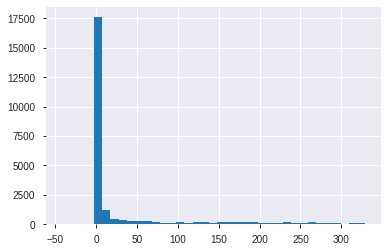

In [22]:
plt.hist(df2019_open.ServiceDiff_Days, bins=37)
plt.show()

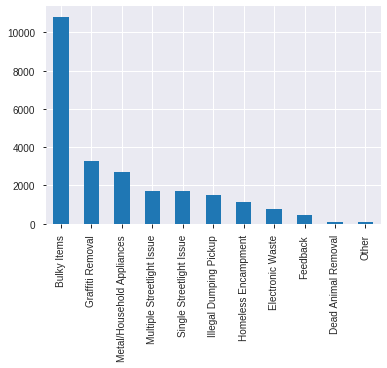

In [23]:
df2019_open['RequestType'].value_counts().plot(kind='bar')